# Tugas Computer Vision - Kernel dan Feature Detection

## Pertama-tama, ganti NIM di nama file ini. Klik <font color="red">File -> Save as... </font>

Lalu isi yang di bawah ini. Untuk mengedit cell ini, double-click di sini.
### NAMA: FITRI WULAN SARI
### NIM: A710190106


In [ ]:
from time import ctime
from os import getcwd
import sys
nama = "Fitri Wulan Sari"     ## Ganti dengan namamu
NIM = "A710190106"     ## Ganti dengan NIM-mu
kota = "Rembang"     ## Ganti dengan kotamu
print("NAMA:", nama)
print("NIM :", NIM)
print("Kota:", kota)
print(ctime())
print("")
print(getcwd())
print(sys.executable)
print(sys.version)

##  Import the libraries

In [ ]:
## Silakan import semua library yang diperlukan di cell ini
import cv2
import numpy as np
import cv2 as cv
from scipy import ndimage
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (9.0, 9.0)
from IPython.display import Image

1. Memakai kamera atau mengambil dari internet, ambil gambar ikon kotamu, terapkan filter blur 3x3, lalu terapkan pula filter *blur* 15x15. Tampilkan gambar asli bersanding dengan gambar hasil filter.

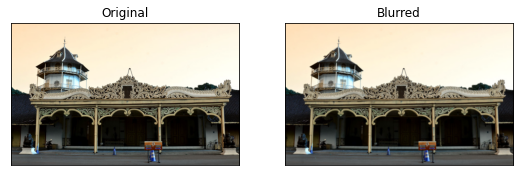

In [ ]:
img = cv2.imread('soc.jpg')
 
blur = cv2.blur(img,(3,3))
 
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

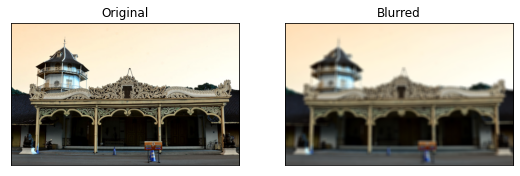

In [ ]:
img = cv2.imread('soc.jpg')
 
blur = cv2.blur(img,(15,15))
 
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

2. Memakai kamera atau mengambil dari internet, ambil gambar ikon kotamu, terapkan filter yang membuat *sharp*. Tampilkan gambar asli bersanding dengan gambar hasil filter.

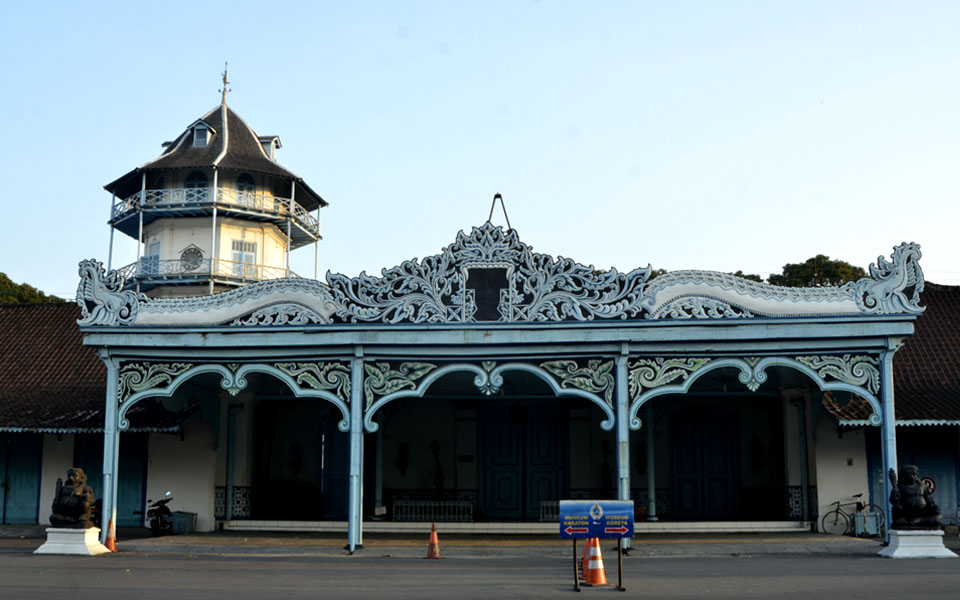

In [ ]:
Image('soc.jpg')

In [ ]:
kernel_1 = np.array([  [-1, -1, -1],
                       [-1,  8, -1],
                       [-1, -1, -1]])

kernel_2 = np.array([[-1, -1, -1, -1, -1],
                       [-1,  1,  2,  1, -1],
                       [-1,  2,  4,  2, -1],
                       [-1,  1,  2,  1, -1],
                       [-1, -1, -1, -1, -1]])

kernel_3 = np.array( [ [ 0, -1,  0 ],
                       [-1,  5,  -1],
                       [ 0, -1,  0 ]  ] )
kernel_4 = np.ones((7,7))/49

img = cv2.imread("soc.jpg", 0)

#blurred = cv2.GaussianBlur(img, (17,17), 0)
#g_hpf = img - blurred

k1 = cv2.filter2D(src=img, ddepth=-1, kernel=kernel_1)
#k1 = ndimage.convolve(img, kernel_1)
k2 = cv2.filter2D(src=img, ddepth=-1, kernel=kernel_2)
k3 = cv2.filter2D(src=img, ddepth=-1, kernel=kernel_3)
k4 = cv2.filter2D(src=img, ddepth=-1, kernel=kernel_4)

Text(0.5, 1.0, 'kernel_4')

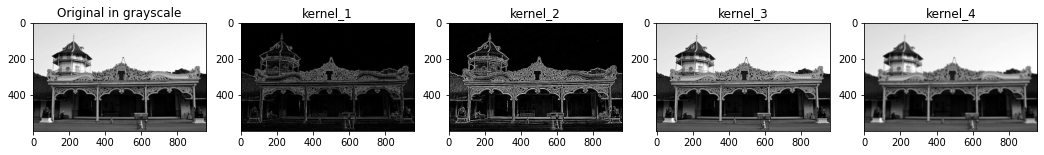

In [ ]:
plt.figure(figsize=[18,10])
plt.subplot(151);plt.imshow(img,cmap='gray',vmin=0, vmax=255);plt.title("Original in grayscale")
plt.subplot(152);plt.imshow(k1,cmap='gray');plt.title("kernel_1")
plt.subplot(153);plt.imshow(k2,cmap='gray');plt.title("kernel_2")
plt.subplot(154);plt.imshow(k3,cmap='gray');plt.title("kernel_3")
plt.subplot(155);plt.imshow(k4,cmap='gray');plt.title("kernel_4")

3. Memakai kamera atau HP, ambil gambar sebuah tumpukan balok atau tumpukan buku, lalu lakukan sebuah *edge detection* menggunakan filter. Tampilkan gambar asli bersanding dengan gambar hasil filter.

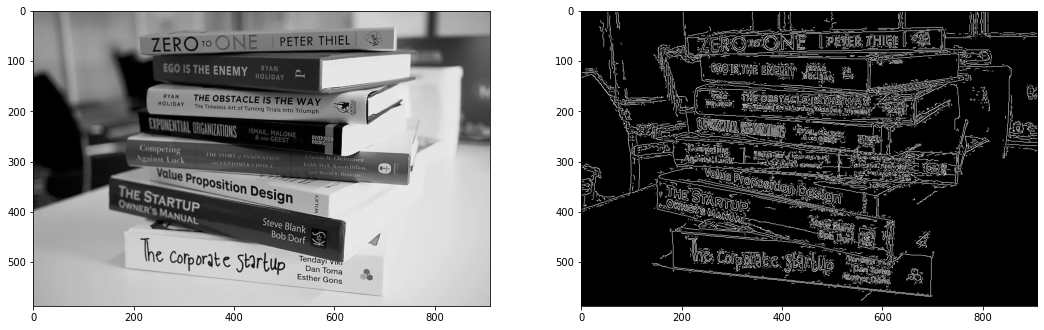

In [ ]:
img = cv2.imread("buku.jpg", 0)
imcol = cv2.imread("buku.jpg")
cn = cv2.Canny(img, 20, 30)
plt.figure(figsize=[18,10])
plt.subplot(121) ; plt.imshow(img,cmap='gray');
plt.subplot(122) ; plt.imshow(cn,cmap='gray')

4. Memakai gambar tumpukan balok/buku pada nomer di atas, terapkan *corner detection*.  Tampilkan gambar asli bersanding dengan gambar hasil filter.

Text(0.5, 1.0, 'Gambar dengan sudut yang ditandai')

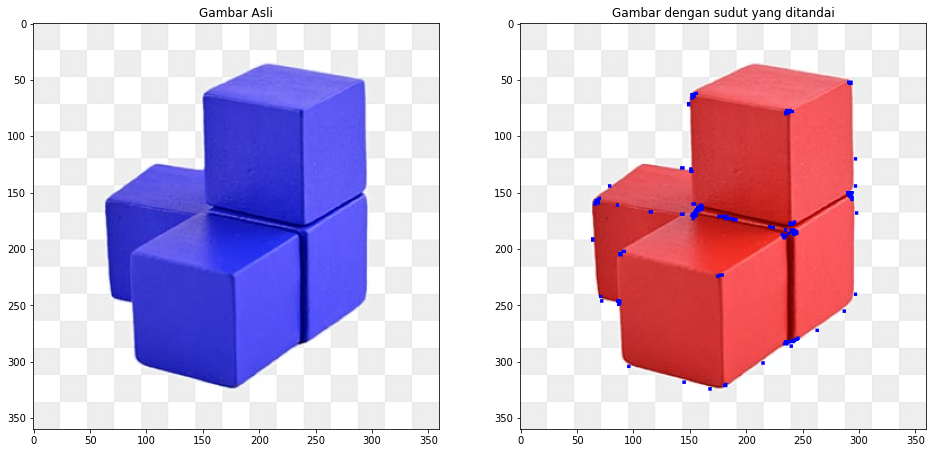

In [ ]:
filename = 'balok.jpg'
img_bl = cv.imread(filename)
gray_bl = cv.cvtColor(img_bl,cv.COLOR_BGR2GRAY)
gray_bl = np.float32(gray_bl)
dst_bl = cv.cornerHarris(gray_bl,2,3,0.04)
#result is dilated for marking the corners, not important
dst_bl = cv.dilate(dst_bl,None)
# Threshold for an optimal value, it may vary depending on the image.

img_bl_cm = img_bl.copy()
img_bl_cm[dst_bl>0.001*dst_bl.max()]=[255,0,0]

plt.figure(figsize=[16,10])
plt.subplot(121); plt.imshow(img_bl,cmap='gray',vmin=0, vmax=255);plt.title("Gambar Asli")
plt.subplot(122); plt.imshow(img_bl_cm[:,:,::-1],vmin=0, vmax=255);plt.title("Gambar dengan sudut yang ditandai")

5. Memakai kamera atau HP, ambil gambar sebuah objek. Lalu ambil gambar objek yang sama dari sudut yang sedikit berbeda dan terdapat benda-benda lain di situ. Lakukan *feature matching* pada kedua gambar itu memakai metode yang ada di video.

In [ ]:
## Teknik Bruce Force Matching

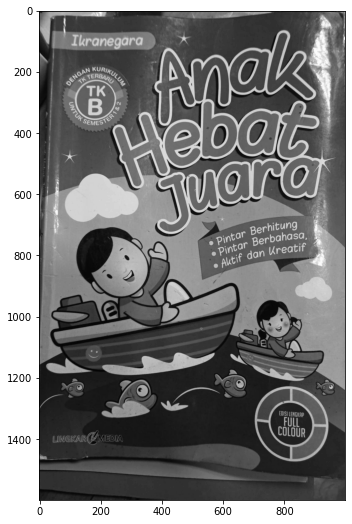

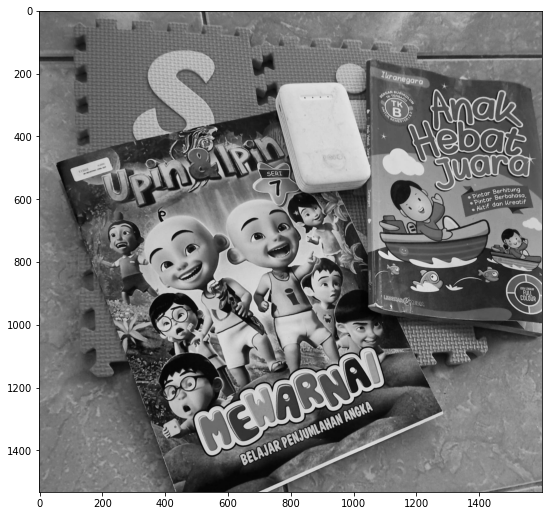

(<matplotlib.image.AxesImage at 0x2d68425b220>, None)

In [ ]:
img1 = cv.imread('buku1.jpeg',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('buku2.jpeg',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

plt.imshow(img1, cmap='gray'),plt.show()
plt.imshow(img2, cmap='gray'),plt.show()

In [ ]:
len(des1)

500

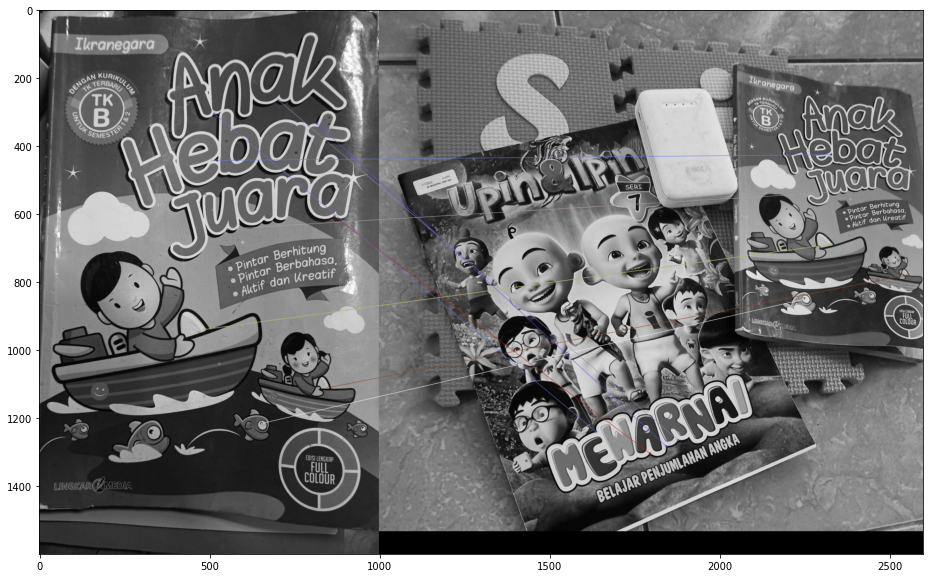

(<matplotlib.image.AxesImage at 0x2d6f5af3cd0>, None)

In [ ]:
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=[16,10])
plt.imshow(img3),plt.show()

500


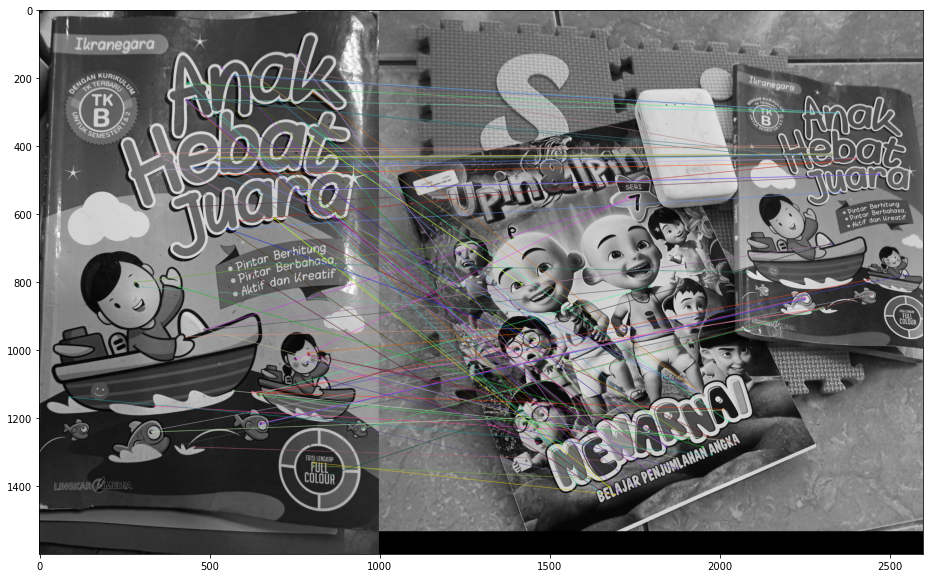

(<matplotlib.image.AxesImage at 0x2d686ff0af0>, None)

In [ ]:
img1 = cv.imread('buku1.jpeg',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('buku2.jpeg',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

print(len(kp1))

# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 50 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:100],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=[16,10])
plt.imshow(img3),plt.show()

In [ ]:
## Teknik Flann Based Matcher

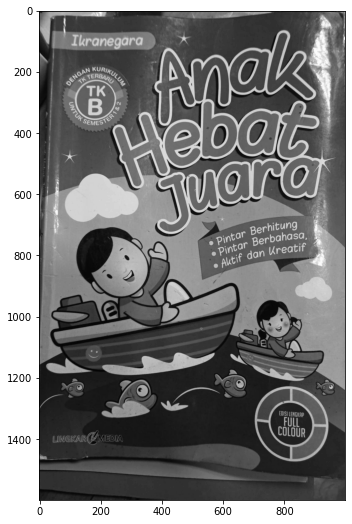

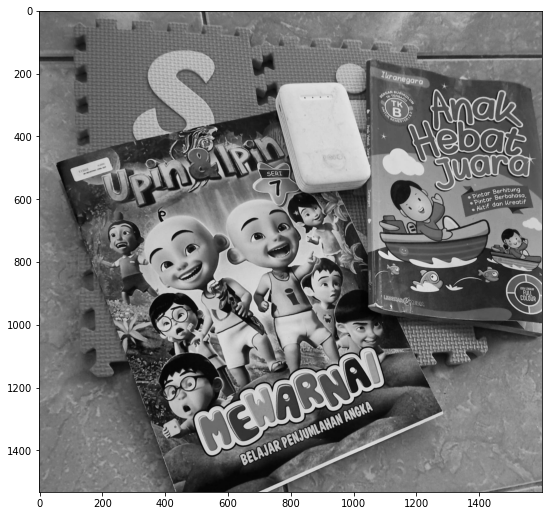

(<matplotlib.image.AxesImage at 0x2d686ecde20>, None)

In [ ]:
MIN_MATCH_COUNT = 10
img1 = cv.imread('buku1.jpeg',0)          # queryImage
img2 = cv.imread('buku2.jpeg',0) # trainImage

# Initiate SIFT detector
sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

plt.imshow(img1, 'gray'),plt.show()
plt.imshow(img2, 'gray'),plt.show()

In [ ]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

In [ ]:
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)
    img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

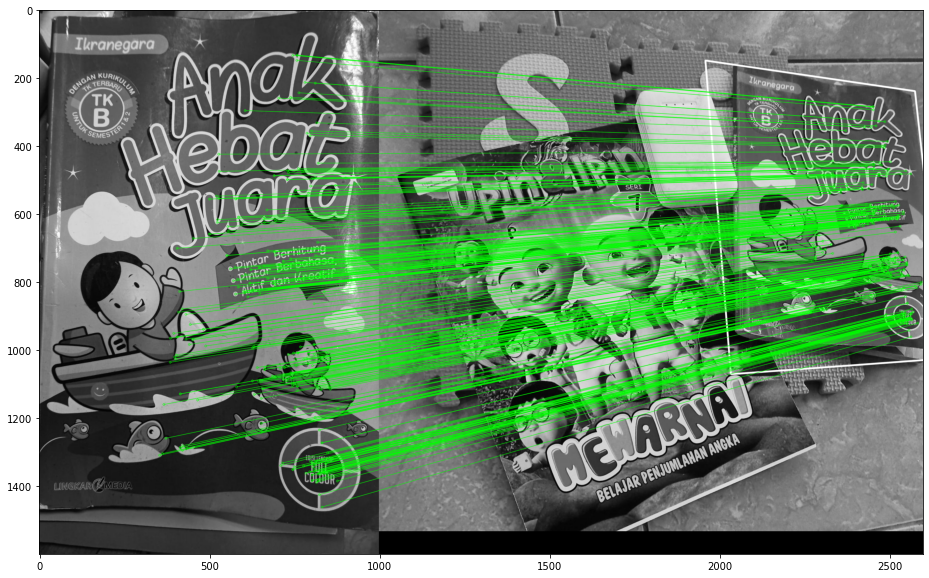

(<matplotlib.image.AxesImage at 0x2d687544160>, None)

In [ ]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.figure(figsize=[16,10])
plt.imshow(img3, 'gray'),plt.show()

## Push ke GitHub